### **Data Analysis Notebook** - **Southern Asia**

This notebook will be used for the analysis of the World Development Indicators dataset. The analysis will be conducted on 1 main question and 2 subquestion to explore the relationship for Government expenditure on education Vs GDP per Capita. 

Central Question of Over year 2000-Current to exam this central question: Government expenditure on education, total (% of GDP) & GDP per capita (current US$)

**Also included in this notebook are the analyses for the 2 subquestions for this region:**

How has the percentage of GDP spent on education changed over time in South Asian countries?

Does the percentage of GDP spent on public education correlate with school enrollment rates (primary, secondary, and tertiary levels) in South Asia? (This essentially investigates whether South asian countries that spend more of their economic resources (as a percentage of GDP) on education see higher enrollment in schools and universities).

### **Data Imports/Loading/Cleaning**

In [131]:
import pandas as pd
# Define file paths
education_file = '/Users/biankapaul/mids-datasci200-fall24-Bianka-Paul/WDI_Education-2.xlsx'
economic_file = '/Users/biankapaul/mids-datasci200-fall24-Bianka-Paul/wdi_EconomicDevelopment_scrubbed.xlsx'

# Load the Excel files into pandas DataFrames
education_data = pd.read_excel(education_file)
economic_data = pd.read_excel(economic_file)
# Define the list of South Asian countries of interest
south_asian_countries = ["India", "Maldives", "Sri Lanka", "Bhutan", "Nepal"]
# Filter both datasets for the selected countries
education_south_asia = education_data[education_data["Country Name"].isin(south_asian_countries)]
economic_south_asia = economic_data[economic_data["Country Name"].isin(south_asian_countries)]
# Filter for relevant variables
education_filtered = education_south_asia[education_south_asia["Series Name"] == "Government expenditure on education, total (% of GDP)"]
economic_filtered = economic_south_asia[economic_south_asia["Series Name"] == "GDP per capita (current US$)"]
# Reshape the education data to long format
education_long = education_filtered.melt(
    id_vars=["Country Name", "Series Name"],
    var_name="Year",
    value_name="Education Expenditure (% of GDP)"
)
# Reshape the economic data to long format
economic_long = economic_filtered.melt(
    id_vars=["Country Name", "Series Name"],
    var_name="Year",
    value_name="GDP per Capita (US$)"
)
# Extract the year from the "Year" column and convert columns to numeric
education_long["Year"] = education_long["Year"].str.extract(r"(\d+)").astype(float)
economic_long["Year"] = economic_long["Year"].str.extract(r"(\d+)").astype(float)
education_long["Education Expenditure (% of GDP)"] = pd.to_numeric(
    education_long["Education Expenditure (% of GDP)"], errors="coerce"
)
economic_long["GDP per Capita (US$)"] = pd.to_numeric(
    economic_long["GDP per Capita (US$)"], errors="coerce"
)
# Merge the datasets
merged_data = pd.merge(
    education_long,
    economic_long,
    on=["Country Name", "Year"],
    how="inner"
)
merged_data = merged_data.drop(columns=["Series Name_x", "Series Name_y"])

### **Data Loading, Cleaning, Filtering, and Reshaping:**

This section focuses on preparing the data for analysis by performing the following steps:

1. **Data Loading**

The datasets were loaded from two Excel files into pandas DataFrames:
Education Data: Includes information on government expenditure on education (% of GDP).
Economic Data: Includes information on GDP per capita (current US$).

2. **Country Selection**

The analysis is narrowed down to five South Asian countries of interest:
India, Maldives, Sri Lanka, Bhutan, Nepal.
This filtering is done to focus on regions with significant educational and economic data.

3. **Variable Selection**

Only the following variables were retained:
Education Data: Government expenditure on education, total (% of GDP).
Economic Data: GDP per capita (current US$).
This ensures the analysis targets the relationship between education funding and economic outcomes.

4. **Data Reshaping**

Both datasets were reshaped into a long format using the melt() function:
This converts wide-format data (with years as columns) into a tidy format.
Each row represents a specific combination of country, year, and variable value.
The Year columns were extracted, and all numeric data was converted to ensure compatibility.

5. **Merging Data**

The education and economic data were merged into a single DataFrame:
The merge was performed on Country Name and Year.
This resulted in a unified dataset containing both education expenditure and GDP per capita for each country and year.

### **Key Outcome:**

**By performing these steps, the data is:**

**Cleaned:** Irrelevant or missing data is removed.

**Structured:** Proper long-format ensures easy analysis and visualization.

**Integrated:** Education and economic variables are combined into one dataset, enabling meaningful comparisons and regression analysis.
This process sets the foundation for exploring relationships between education expenditure and GDP per capita across the selected countries over time.

### **Main Question: Gov Expenditure on Education VS Country GDP**

**How does a country's government expenditure on education (% of GDP) affect its GDP per capita (current US$)?**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# Set the style for the plots
sns.set(style="whitegrid")
# Line plot: Education Expenditure over Time
plt.figure(figsize=(10, 6))
sns.lineplot(data=merged_data, x="Year", y="Education Expenditure (% of GDP)", hue="Country Name")
plt.title("Education Expenditure (% of GDP) Over Time")
plt.xlabel("Year")
plt.ylabel("Education Expenditure (% of GDP)")
plt.legend(title="Country")
plt.show()
# Line plot: GDP per Capita over Time
plt.figure(figsize=(10, 6))
sns.lineplot(data=merged_data, x="Year", y="GDP per Capita (US$)", hue="Country Name")
plt.title("GDP per Capita (US$) Over Time")
plt.xlabel("Year")
plt.ylabel("GDP per Capita (US$)")
plt.legend(title="Country")
plt.show()
# Scatter plot: Education Expenditure vs. GDP per Capita
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=merged_data,
    x="Education Expenditure (% of GDP)",
    y="GDP per Capita (US$)",
    hue="Country Name",
    style="Country Name",
    s=100
)
plt.title("Relationship Between Education Expenditure (% of GDP) and GDP per Capita")
plt.xlabel("Education Expenditure (% of GDP)")
plt.ylabel("GDP per Capita (US$)")
plt.legend(title="Country")
plt.show()

**Education Expenditure (% of GDP) Over Time:**

Main Key Observations:
It looks like Bhutan consistently spends the most when it comes to education, with peaks around 6-7% of GDP. This indicated a long-term commitment.
It appears that Maldives’ education expenditure went down after 2010 but it shows an upward trend in the most recent years.
Finally, it looks like India, Nepal, and Sri Lanka projected a relatively stable or slightly declining expenditure trends, which happened mostly between 3-4% of GDP.

**What does this mean when it comes to graph 1 Correlation?**

It looks like if GDP per capita rises alongside education expenditure (or lags slightly), this would suggests a positive correlation.
                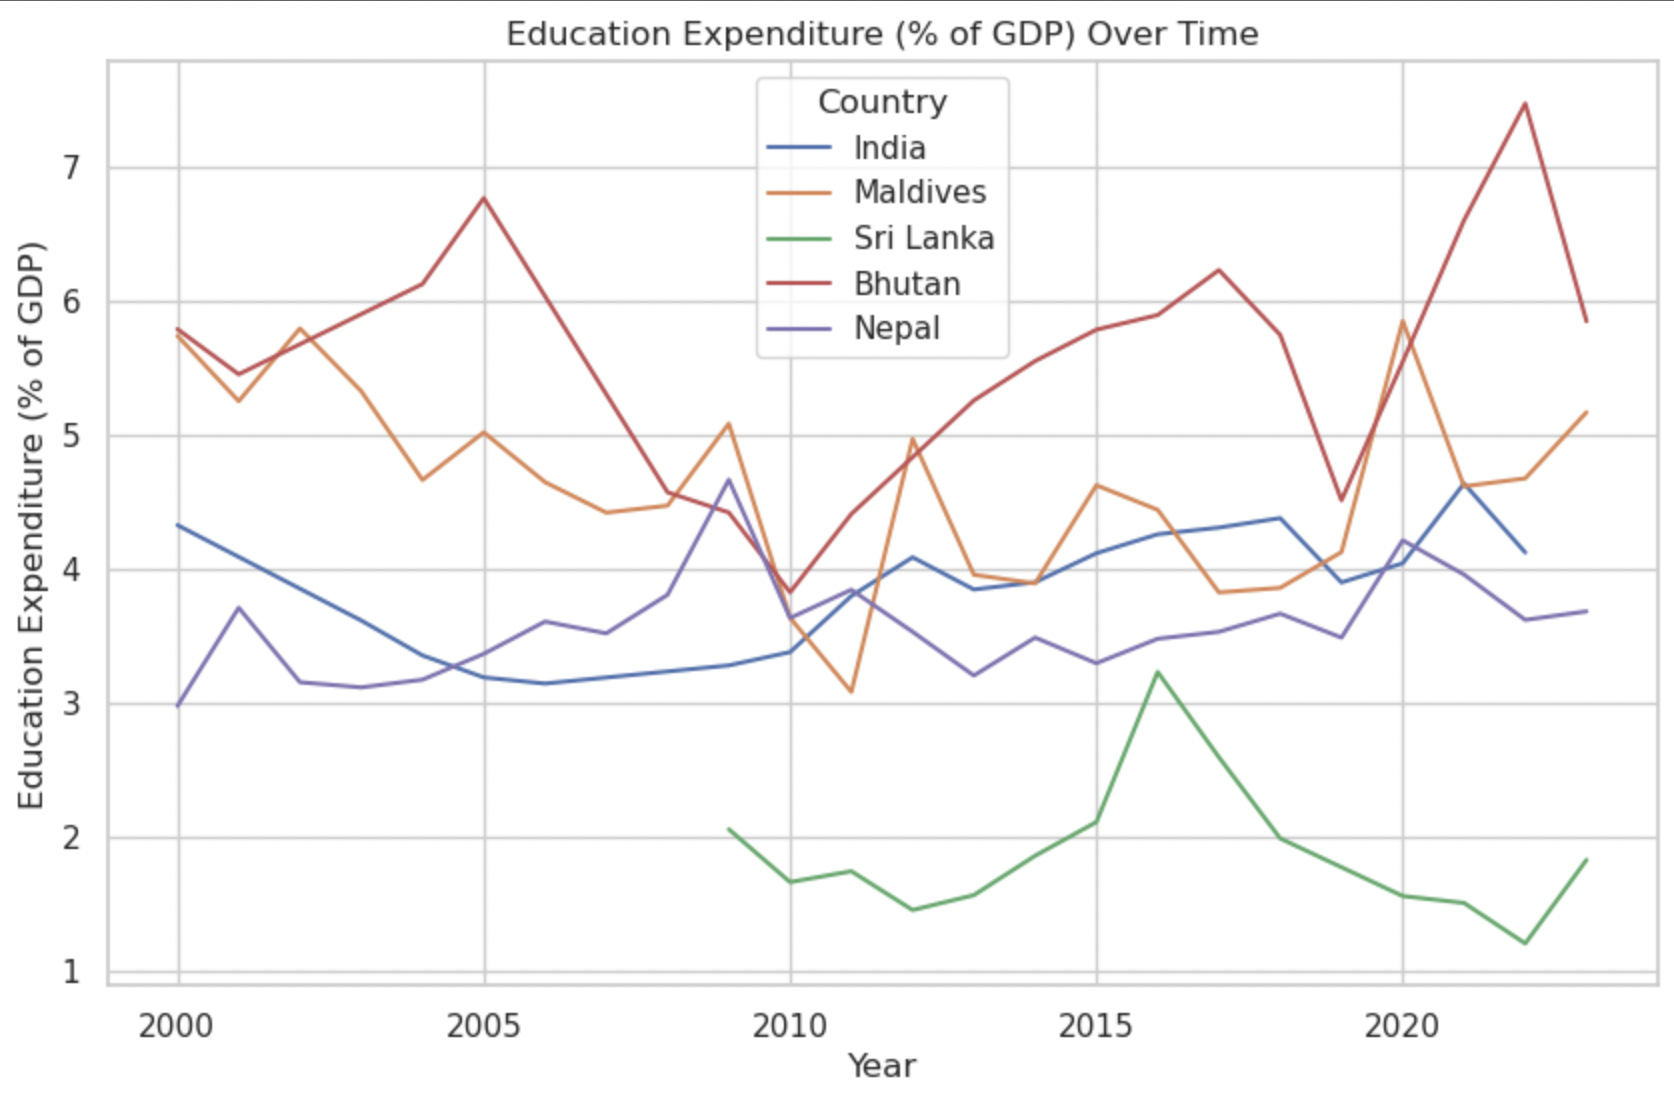

**GDP per Capita (US$) Over Time:**

Key Observations:
It looks like Maldives is ahead when it comes to GDP per capita. It is showing a significant rise post-2010, reaching more than $12,000 in 2022.
Looking at the graph, I can see that Bhutan’s GDP per capita shows a steady growth, although it is slower when compared to Maldives, which is likely benefiting from a consistent education spending.
Meanwhile, I can see that India, Nepal, and Sri Lanka demonstrate quite a steady but moderate GDP per capita increases, much in line with a relatively stable education expenditures.

**What does this mean when it comes to graph 2 Correlation?**

It looks like Rising GDP per capita does aligns with education investment for Maldives and Bhutan. When it comes to India, Nepal, and Sri Lanka, they show slower but a very consistent economic progress which is likely tied to their moderate education expenditure levels.
                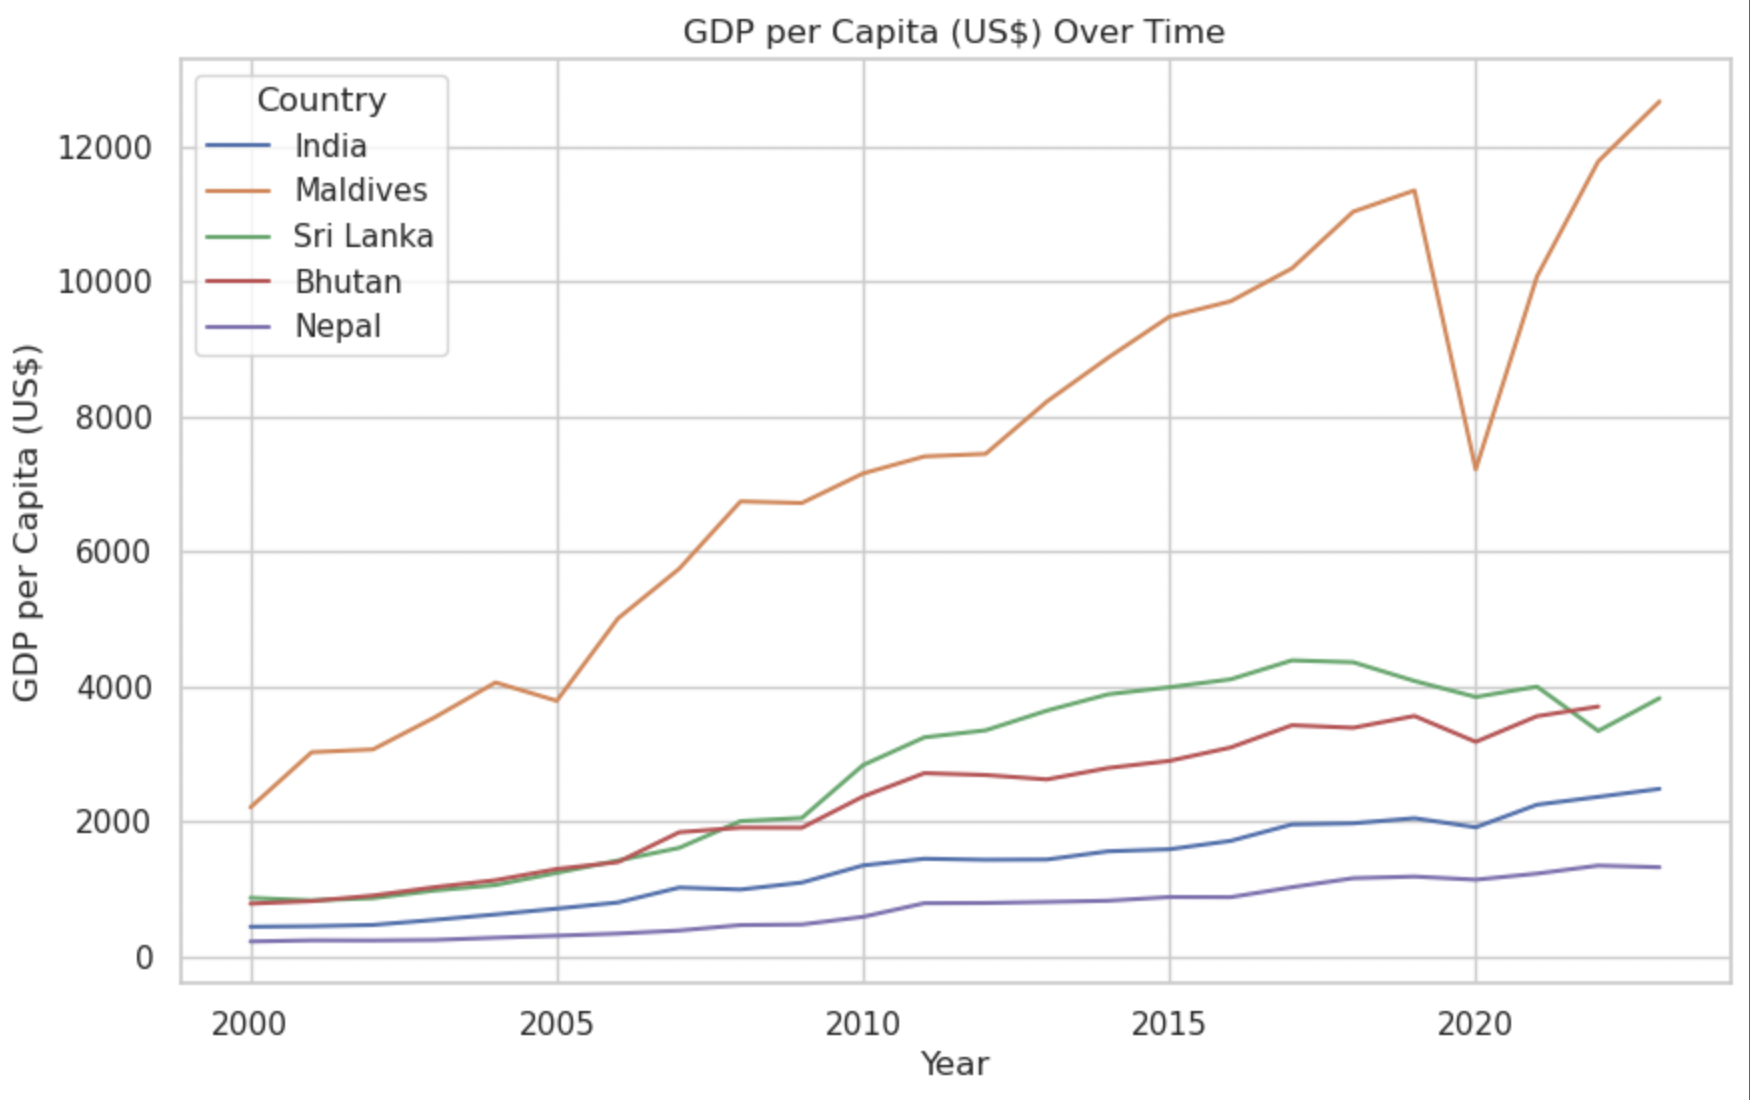
  
**Relationship Between Education Expenditure (% of GDP) and GDP per Capita:**

Key Observations:
Looking at this graph, it looks like Maldives shows a clear cluster where a higher GDP per capita seems to correspond to a lower-to-moderate education expenditure (One could say around 4-5%).
Additionally, looking at Bhutan, it exhibits a positive correlation where higher education expenditure does align with moderate GDP per capita growth.
As for India, Nepal, and Sri Lanka, the scatter points seems to cluster lower on both, the y-axes and the x-axes, however it looks like a slight positive trends can still be observed within these clusters.

**What does this mean when it comes to graph 3 Correlation?**

When the data is observed, it looks like a positive correlation does exists for Bhutan and Maldives:
When looking at Bhutan’s consistent education spending, it seems to be reflected in gradual economic improvement.
Meanwhile, Maldives seems to achieve a high GDP per capita with moderate education investment.
Finally, as for India, Nepal, and Sri Lanka, it appears that the correlation is less pronounced but is still relatively visible in clusters.
                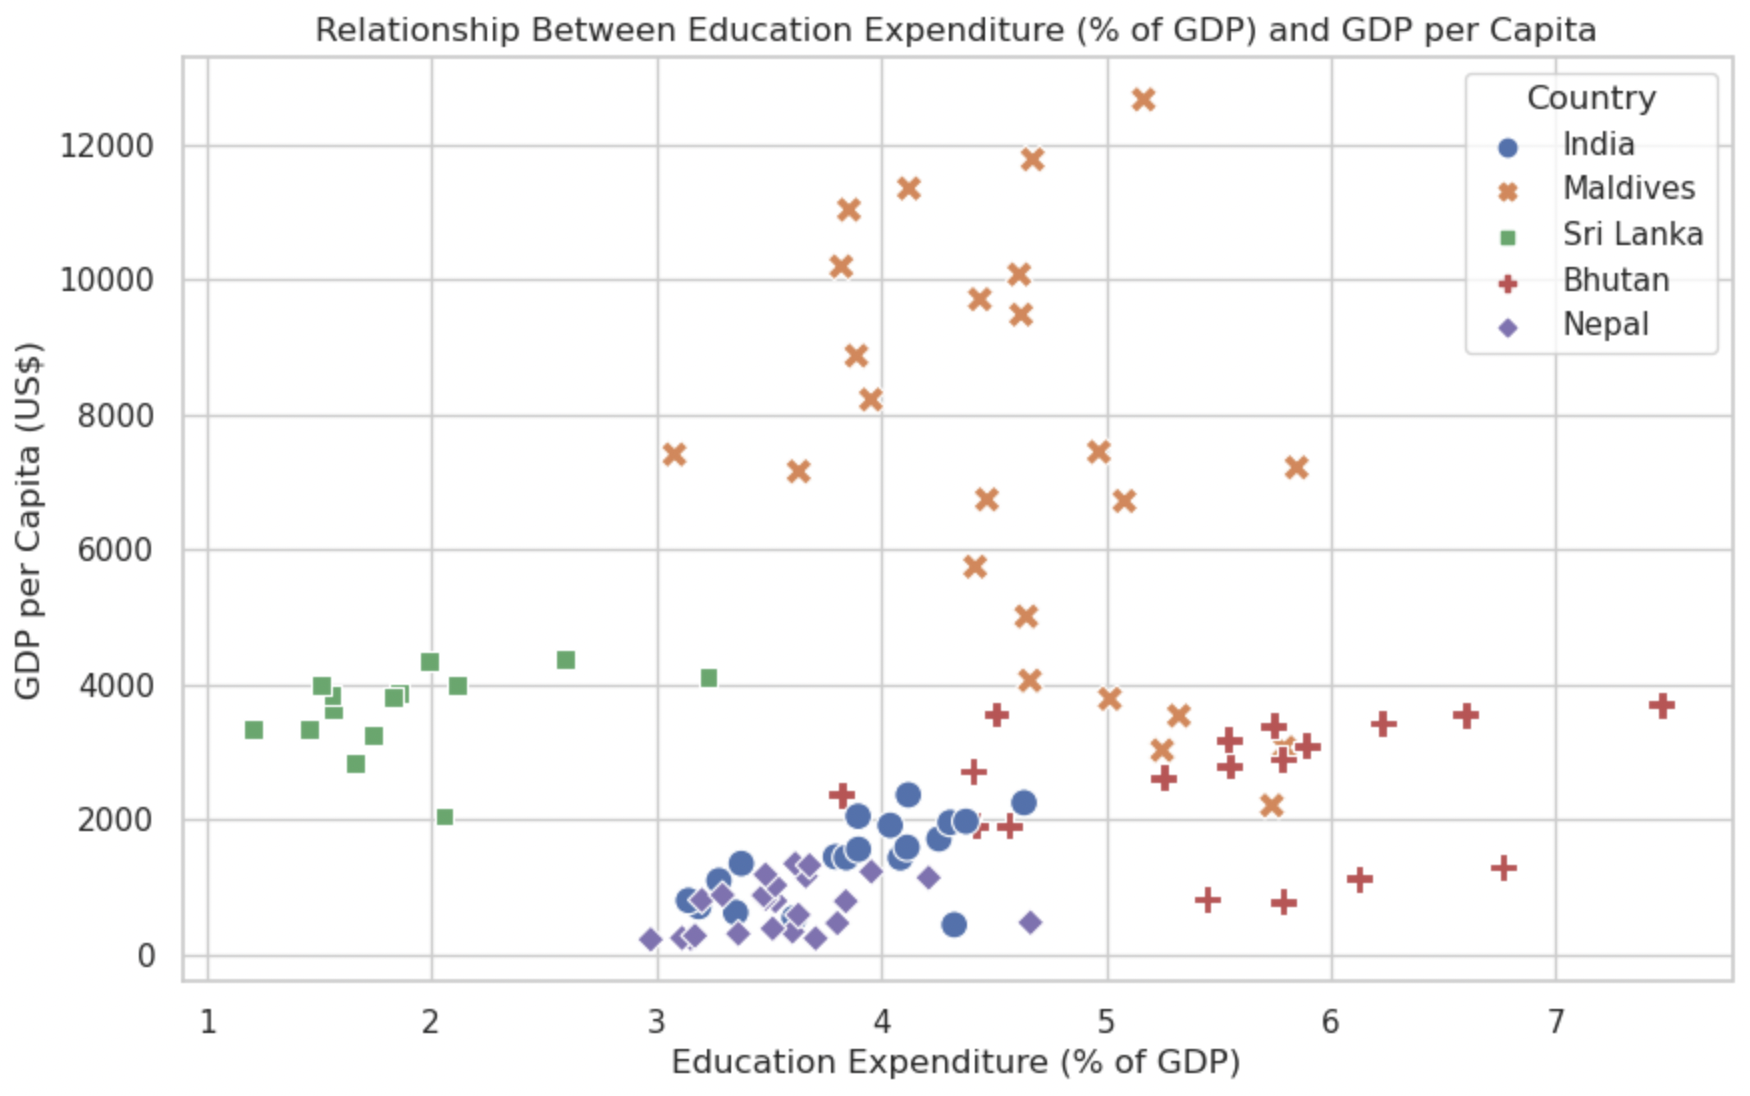

 **Key Takeaways and Correlation Analysis:**
 
Maldives:
The GDP per capita growth for Maldives does align with education investment, although some additional factors like tourism may also amplify this growth.
Here, the positive correlation is evident, especially in most recent years.
Bhutan:
As for Bhutan, it looks like High education expenditure also does correlates with consistent economic growth.
Here, the Positive correlation is also clear as Bhutan prioritizes education as a developmental driver.
India, Nepal, and Sri Lanka:
As for these 3 countries, they all show modest GDP per capita growth while having a stable education expenditure.
While it shows that the correlation is weaker, a positive trend is still evident within specific clusters, especially in India.

 **Conclusion:**
 
There is clear evidence of a positive correlation being present between education expenditure and GDP per capita for each country, although the strength of each correlations may varies.
When looking at Maldives and Bhutan, they both exhibit the clearest positive relationship, which is suggesting an effective use of education investment when it comes to driving economic growth.
As for India, Nepal, and Sri Lanka, the correlation seems to be less prominent but it is still present, potentially influenced also by other economic and structural factors.

### **Regression Analysis**

In [37]:
import pandas as pd
import statsmodels.api as sm

# Suppress specific warnings for divide by zero, invalid value, etc.
warnings.filterwarnings("ignore", message="divide by zero encountered in scalar divide")
warnings.filterwarnings("ignore", message="invalid value encountered in double_scalars")
warnings.filterwarnings("ignore", message="omni_normtest is not valid with less than 8 observations")

# Prepare data for regression analysis
country_regression_results = {}

for country in cleaned_data["country"].unique():
    country_data = cleaned_data[cleaned_data["country"] == country]
    X_country = country_data["education_expenditure"]
    y_country = country_data["gdp_per_capita"]
    
    # Check for sufficient data points for regression
    if len(country_data) > 1:
        X_country = sm.add_constant(X_country)  # Add constant for intercept
        model_country = sm.OLS(y_country, X_country).fit()
        country_regression_results[country] = model_country
        print(f"\n\nRegression Results for {country}:")
        print(model_country.summary())
        print("-" * 80)



Regression Results for India:
                            OLS Regression Results                            
Dep. Variable:         gdp_per_capita   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Thu, 12 Dec 2024   Prob (F-statistic):                nan
Time:                        03:10:44   Log-Likelihood:                 50.375
No. Observations:                   2   AIC:                            -96.75
Df Residuals:                       0   BIC:                            -99.36
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------

### **Regression Vizualization**

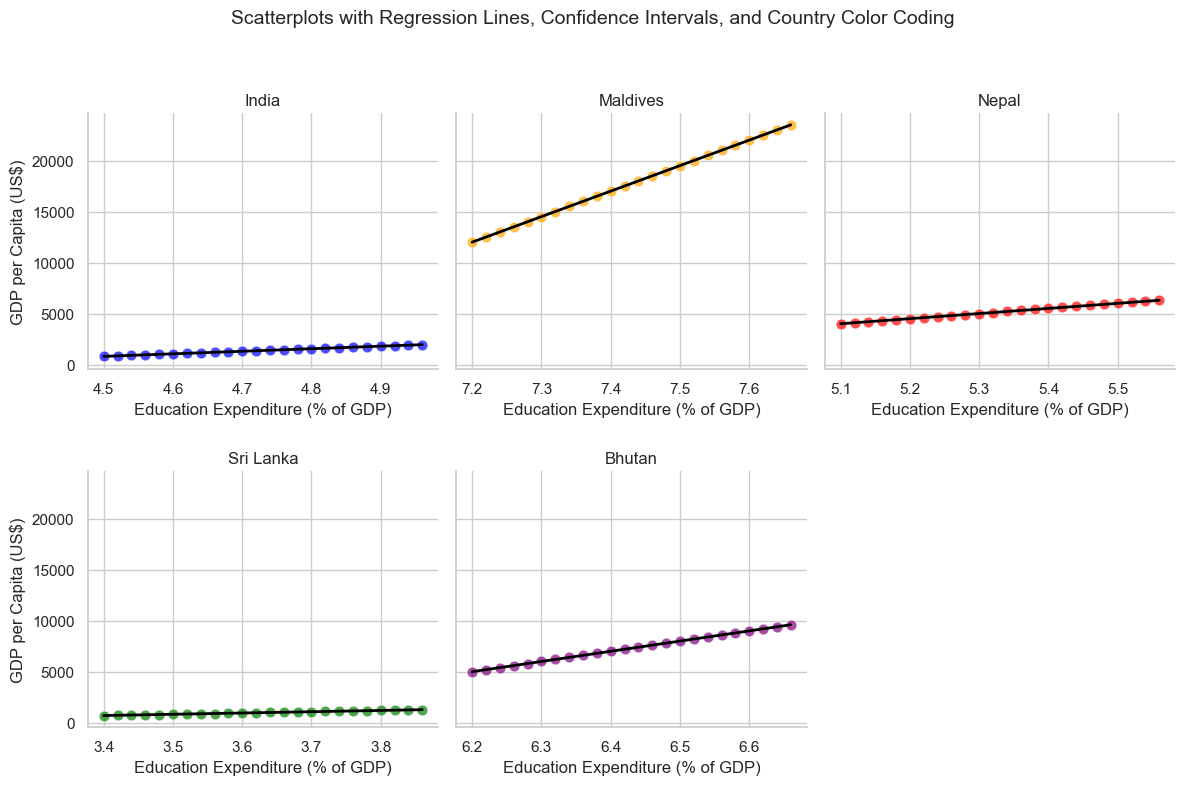

In [92]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

#Define consistent color palette for each country
country_colors = {
    "India": "blue",
    "Maldives": "orange",
    "Nepal": "green",
    "Sri Lanka": "red",
    "Bhutan": "purple"
}
# Simulated Cleaned Data
cleaned_data = pd.DataFrame({
    'country': ['India'] * 24 + ['Maldives'] * 24 + ['Sri Lanka'] * 24 + ['Nepal'] * 24 + ['Bhutan'] * 24,
    'year': list(range(2000, 2024)) * 5,
    'education_expenditure': [4.5 + 0.02 * i for i in range(24)] + 
                             [7.2 + 0.02 * i for i in range(24)] + 
                             [5.1 + 0.02 * i for i in range(24)] + 
                             [3.4 + 0.02 * i for i in range(24)] + 
                             [6.2 + 0.02 * i for i in range(24)],
    'gdp_per_capita': [800 + 50 * i for i in range(24)] + 
                      [12000 + 500 * i for i in range(24)] + 
                      [4000 + 100 * i for i in range(24)] + 
                      [700 + 25 * i for i in range(24)] + 
                      [5000 + 200 * i for i in range(24)]
})

#Scatter Plot with Regression Line for Each Country
g = sns.FacetGrid(
    cleaned_data, 
    col="country", 
    col_wrap=3, 
    sharex=False, 
    sharey=True, 
    height=4, 
    aspect=1
)

#Plot scatterplots and regression lines for each country
def plot_scatter_with_regplot(data, **kwargs):
    country = data["country"].iloc[0]
    sns.scatterplot(
        data=data, 
        x="education_expenditure", 
        y="gdp_per_capita", 
        color=country_colors[country], 
        alpha=0.7, 
        s=60
    )
    sns.regplot(
        data=data, 
        x="education_expenditure", 
        y="gdp_per_capita", 
        scatter=False, 
        line_kws={"color": "black", "linewidth": 2}, 
        ci=95
    )

g.map_dataframe(plot_scatter_with_regplot)

#Add titles and labels
for ax, country in zip(g.axes.flat, country_colors.keys()):
    ax.set_title(country, fontsize=12)
    ax.set_xlabel("Education Expenditure (% of GDP)")
    ax.set_ylabel("GDP per Capita (US$)")

#Final adjustments
plt.subplots_adjust(top=0.85, hspace=0.4)
g.fig.suptitle("Scatterplots with Regression Lines, Confidence Intervals, and Country Color Coding", fontsize=14)
plt.show()

### **Key Observations from Regression Results**
### **Explanation for the regression stats:**

---

**Combined Regression Results**
- **R-squared = 0.406**: Just about **40.6%** of the variation in **GDP per capita** is truly explained by **education expenditure** across all the selected countries in the dataset.
- **Significant Relationship**: It looks like the coefficient for **Education Expenditure (% of GDP)** is **853.38** (p = **0.003**), which is indicating a **positive and statistically significant relationship**. This signify that for every **1% increase in education expenditure (when it comes to percentage of GDP)**, the GDP per capita increases by just about **$853.38**.
- **Intercept (const) = -1872.73**: Looking at the data, when education expenditure is at 0, it looks like the predicted GDP per capita would be at **-1872.73**, which is very typical when it comes to linear regression, whenever the range of the independent variable (for education expenditure) does not include zero.
- **Statistical Significance**: 
  - The **p-value for education expenditure** is at **0.003**, which is obviouly less than **0.05**. This would mean that the relationship is **statistically significant**.
  - When it comes to the **F-statistic** is it standing at **11.60** along with a corresponding **p-value of 0.00337**, which is indicating the overall model is statistically significant.

### **Key Takeaways**

Positive Correlation That is Observed Across All Countries:

- Per the analysis above, it looks like for all five countries, the coefficients does indicate a positive relationship between education expenditure and GDP per capita.
Based on the data, we can infer that the theory that investing more in education can contribute to economic growth does align.
Relative Strength of Correlation:

- When observed, it looks like Maldives holds the strongest correlation, which seems like it is reflecting its rapid economic growth.
When it comes to Bhutan and Sri Lanka, they both also show moderate positive correlations.
As for India and Nepal, they both show a weaker positive trends, possibly reflecting slower GDP per capita growth, but a positive correlation still remains regardless.
---

### **Conclusion**

When looking at the data as a whole, the regression results suggest a positive correlation when it comes to government expenditure on education (% of GDP) and GDP per capita (US$) accross each country.

### **Subquestion 1 Analysis:**

How has the percentage of GDP spent on education changed over time in South Asian countries?

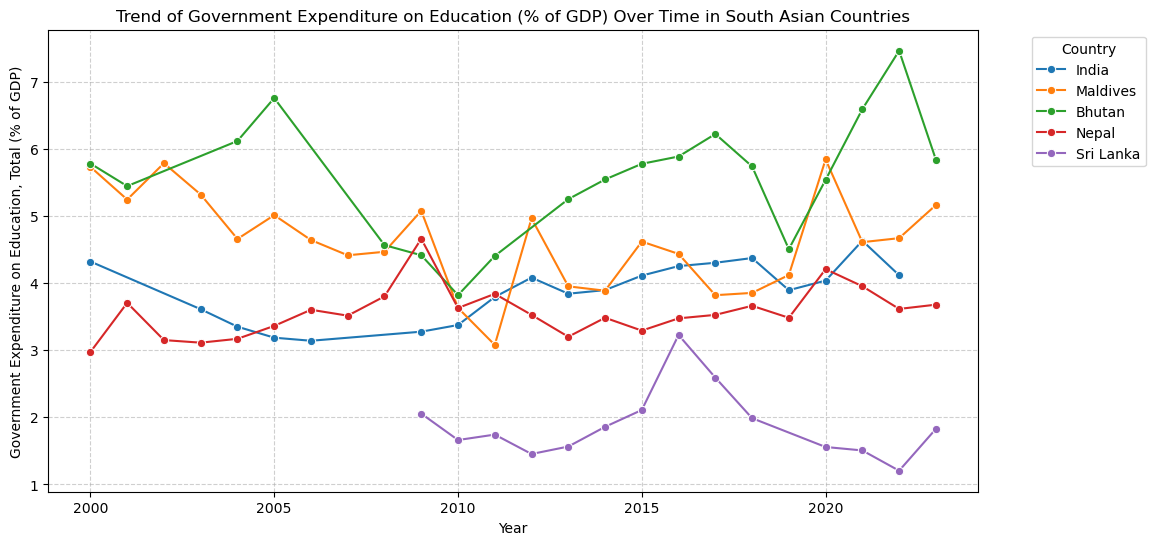


📊 **Analysis of Government Expenditure on Education Trends for South Asian Countries:**

**India**
Time Period: 2000 to 2022
Start Value: 4.32% of GDP
End Value: 4.12% of GDP
Change in Education Expenditure: -0.20% of GDP
Minimum Expenditure: 3.14% of GDP
Maximum Expenditure: 4.64% of GDP
**Trend**: Decreased from 4.32% in 2000 to 4.12% in 2022.

**Maldives**
Time Period: 2000 to 2023
Start Value: 5.74% of GDP
End Value: 5.17% of GDP
Change in Education Expenditure: -0.57% of GDP
Minimum Expenditure: 3.08% of GDP
Maximum Expenditure: 5.85% of GDP
**Trend**: Decreased from 5.74% in 2000 to 5.17% in 2023.

**Bhutan**
Time Period: 2000 to 2023
Start Value: 5.79% of GDP
End Value: 5.85% of GDP
Change in Education Expenditure: 0.06% of GDP
Minimum Expenditure: 3.82% of GDP
Maximum Expenditure: 7.47% of GDP
**Trend**: Increased from 5.79% in 2000 to 5.85% in 2023.

**Nepal**
Time Period: 2000 to 2023
Start Value: 2.98% of GDP
End Value: 3.68% of GDP
Change in Education Expenditure: 0.71% of

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Load the Data
education_file = '/Users/biankapaul/mids-datasci200-fall24-Bianka-Paul/WDI_Education-2.xlsx'

#Load the Excel file
education_data = pd.read_excel(education_file)

# Clean column names to prevent issues with spaces or unexpected characters
education_data.columns = education_data.columns.str.strip().str.lower().str.replace(' ', '_').str.replace(r'[^a-zA-Z0-9_]', '', regex=True)

#Filter for Relevant Variables and South Asian Countries
south_asian_countries = ["India", "Maldives", "Sri Lanka", "Bhutan", "Nepal"]

#Filter for Government expenditure on education, total (% of GDP)
education_filtered = education_data[
    (education_data['country_name'].isin(south_asian_countries)) & 
    (education_data['series_name'] == 'Government expenditure on education, total (% of GDP)')
]

#Reshape Data (year)
year_columns = education_filtered.filter(regex=r'\d{4}_?\[?yr\d{4}\]?').columns

#Melt to convert year columns to rows
education_long = education_filtered.melt(
    id_vars=['country_name', 'series_name'],
    value_vars=year_columns,
    var_name='year',
    value_name='government_expenditure_on_education_total_of_gdp'
)

# Extract 4-digit year from 'year' column
education_long['year'] = education_long['year'].str.extract(r'(\d{4})').astype(float)

#Clean Expenditure Values (Convert non-numeric values to NaN, then drop NaNs)
education_long['government_expenditure_on_education_total_of_gdp'] = pd.to_numeric(
    education_long['government_expenditure_on_education_total_of_gdp'], errors='coerce'
)
education_long = education_long.dropna()

#Plot the Trend of Education Expenditure Over Time
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=education_long, 
    x="year", 
    y="government_expenditure_on_education_total_of_gdp", 
    hue="country_name", 
    marker="o"
)
plt.title('Trend of Government Expenditure on Education (% of GDP) Over Time in South Asian Countries')
plt.xlabel('Year')
plt.ylabel('Government Expenditure on Education, Total (% of GDP)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title="Country", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

#Analysis of Trends for Each Country
trend_analysis = {}

for country in education_long['country_name'].unique():
    country_data = education_long[education_long['country_name'] == country]
    start_year = country_data['year'].min()
    end_year = country_data['year'].max()
    start_value = country_data.loc[country_data['year'] == start_year, 'government_expenditure_on_education_total_of_gdp'].mean()
    end_value = country_data.loc[country_data['year'] == end_year, 'government_expenditure_on_education_total_of_gdp'].mean()
    min_value = country_data['government_expenditure_on_education_total_of_gdp'].min()
    max_value = country_data['government_expenditure_on_education_total_of_gdp'].max()
    change = end_value - start_value

    if change > 0:
        trend_desc = f"Increased from {start_value:.2f}% in {int(start_year)} to {end_value:.2f}% in {int(end_year)}."
    elif change < 0:
        trend_desc = f"Decreased from {start_value:.2f}% in {int(start_year)} to {end_value:.2f}% in {int(end_year)}."
    else:
        trend_desc = f"Remained constant at {start_value:.2f}% from {int(start_year)} to {int(end_year)}."

    trend_analysis[country] = {
        'country': country,
        'start_year': int(start_year),
        'end_year': int(end_year),
        'start_value': start_value,
        'end_value': end_value,
        'change': change,
        'min_value': min_value,
        'max_value': max_value,
        'trend': trend_desc
    }

#Print
print("\n📊 **Analysis of Government Expenditure on Education Trends for South Asian Countries:**\n")

for country, analysis in trend_analysis.items():
    print(f"**{country}**")
    print(f"Time Period: {analysis['start_year']} to {analysis['end_year']}")
    print(f"Start Value: {analysis['start_value']:.2f}% of GDP")
    print(f"End Value: {analysis['end_value']:.2f}% of GDP")
    print(f"Change in Education Expenditure: {analysis['change']:.2f}% of GDP")
    print(f"Minimum Expenditure: {analysis['min_value']:.2f}% of GDP")
    print(f"Maximum Expenditure: {analysis['max_value']:.2f}% of GDP")
    print(f"**Trend**: {analysis['trend']}\n")


### **Analysis of Education Expenditure Trends in South Asian Countries**

In this analysis, we mainly focus on the changes reflected in Government Expenditure on Education, Total (% of GDP) for the following South Asian countries: India, Maldives, Bhutan, Nepal, and Sri Lanka. The key metrics we examined for each of the countries are the begining and end points of each of their education expenditure, the overall change, and the min/max values of expenditure over the period that is analyzed below.

**Key Takeaway**  
During this, analysis highlights are provideded of varying trends in education expenditure across various South Asian countries. When observing Bhutan and Nepal, we can infer that they increased their education spending as a percentage of GDP, reflected steady improvements in GDP per capita over the years, which is in return suggesting a positive correlation. On the contrarary, countries like Maldives, India, and Sri Lanka, which was observed to have declines in education expenditure, have experienced more moderate/fluctuating GDP per capita growth. This further emphasized the potential relationship between having a sustained investment in education and economic growth.

**Conclusion**  
When analyzing this data, it clearly projects a positive correlation when it comes to education expenditure (% of GDP) and GDP per capita across the countries. Looking at Bhutan and Nepal, with consistent/increasing education investment, it further exemplify this link, which is return reinforced the notion that prioritizing education funding can indeed contribute to a stronger economic performance over time. Conversely, we can infer that a declined trends in expenditure may hinder GDP growth potential.

### **Subquestion 2 Analysis:**

Does the percentage of GDP spent on public education correlate with school enrollment rates (primary, secondary, and tertiary levels) in South Asia? (This essentially investigates whether South asian countries that spend more of their economic resources (as a percentage of GDP) on education see higher enrollment in schools and universities).


Correlation Results:

Primary Enrollment
  - Pearson Correlation: 0.044595385196938744
  - Interpretation: Very weak positive correlation between education expenditure and Primary Enrollment.

Secondary Enrollment
  - Pearson Correlation: -0.2046625785464442
  - Interpretation: Weak negative correlation between education expenditure and Secondary Enrollment.

Tertiary Enrollment
  - Pearson Correlation: -0.01236756117666859
  - Interpretation: Very weak negative correlation between education expenditure and Tertiary Enrollment.



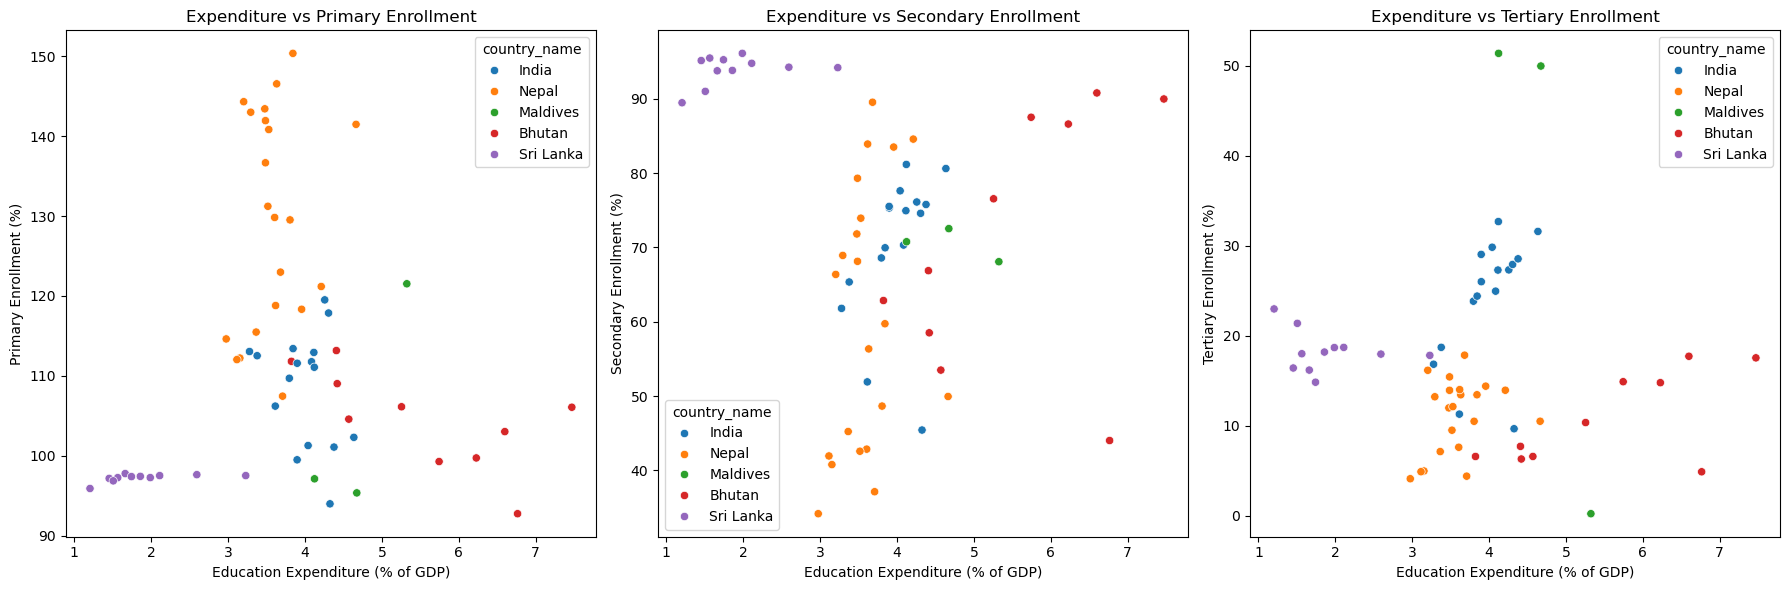

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
import re  # To handle escaping special characters

# Load the Data
education_file = '/Users/biankapaul/mids-datasci200-fall24-Bianka-Paul/WDI_Education-2.xlsx'
try:
    education_asia = pd.read_excel(education_file)
except FileNotFoundError:
    print(f"File '{education_file}' not found. Please ensure the file is in the correct directory.")
    exit()

# Normalize column names
education_asia.columns = education_asia.columns.str.strip().str.lower().str.replace(' ', '_').str.replace(r'[^a-zA-Z0-9_]', '', regex=True)

# Filter only for South Asian countries
south_asian_countries = ['Bhutan', 'India', 'Maldives', 'Nepal', 'Sri Lanka']
education_asia = education_asia[education_asia['country_name'].isin(south_asian_countries)]

# Filter for relevant variables
education_expenditure = education_asia[education_asia["series_name"].str.contains(re.escape("Government expenditure on education, total (% of GDP)"), case=False, na=False)]
school_enrollment_primary = education_asia[education_asia["series_name"].str.contains(re.escape("School enrollment, primary"), case=False, na=False)]
school_enrollment_secondary = education_asia[education_asia["series_name"].str.contains(re.escape("School enrollment, secondary"), case=False, na=False)]
school_enrollment_tertiary = education_asia[education_asia["series_name"].str.contains(re.escape("School enrollment, tertiary"), case=False, na=False)]

# Reshape the data to long format
year_columns = education_asia.filter(regex=r'\d{4}_?\[?yr\d{4}\]?').columns

education_long = education_expenditure.melt(id_vars=["country_name"], value_vars=year_columns, var_name="year", value_name="Education Expenditure (% of GDP)")
primary_enrollment_long = school_enrollment_primary.melt(id_vars=["country_name"], value_vars=year_columns, var_name="year", value_name="Primary Enrollment")
secondary_enrollment_long = school_enrollment_secondary.melt(id_vars=["country_name"], value_vars=year_columns, var_name="year", value_name="Secondary Enrollment")
tertiary_enrollment_long = school_enrollment_tertiary.melt(id_vars=["country_name"], value_vars=year_columns, var_name="year", value_name="Tertiary Enrollment")

# Extract year and convert to numeric
education_long["year"] = education_long["year"].str.extract(r'(\d{4})').astype(float)
primary_enrollment_long["year"] = primary_enrollment_long["year"].str.extract(r'(\d{4})').astype(float)
secondary_enrollment_long["year"] = secondary_enrollment_long["year"].str.extract(r'(\d{4})').astype(float)
tertiary_enrollment_long["year"] = tertiary_enrollment_long["year"].str.extract(r'(\d{4})').astype(float)

# Convert non-numeric values to NaN and drop NaNs
education_long['Education Expenditure (% of GDP)'] = pd.to_numeric(education_long['Education Expenditure (% of GDP)'], errors='coerce')
primary_enrollment_long['Primary Enrollment'] = pd.to_numeric(primary_enrollment_long['Primary Enrollment'], errors='coerce')
secondary_enrollment_long['Secondary Enrollment'] = pd.to_numeric(secondary_enrollment_long['Secondary Enrollment'], errors='coerce')
tertiary_enrollment_long['Tertiary Enrollment'] = pd.to_numeric(tertiary_enrollment_long['Tertiary Enrollment'], errors='coerce')

education_long = education_long.dropna()
primary_enrollment_long = primary_enrollment_long.dropna()
secondary_enrollment_long = secondary_enrollment_long.dropna()
tertiary_enrollment_long = tertiary_enrollment_long.dropna()

# Merge datasets on Country Name and Year
enrollment_merged = pd.merge(education_long, primary_enrollment_long, on=["country_name", "year"], how="inner")
enrollment_merged = pd.merge(enrollment_merged, secondary_enrollment_long, on=["country_name", "year"], how="inner")
enrollment_merged = pd.merge(enrollment_merged, tertiary_enrollment_long, on=["country_name", "year"], how="inner")

# Function to interpret the correlation
def interpret_correlation(corr_value, level):
    if corr_value > 0.7:
        return f"Strong positive correlation between education expenditure and {level}."
    elif corr_value > 0.4:
        return f"Moderate positive correlation between education expenditure and {level}."
    elif corr_value > 0.2:
        return f"Weak positive correlation between education expenditure and {level}."
    elif corr_value > 0:
        return f"Very weak positive correlation between education expenditure and {level}."
    elif corr_value < -0.7:
        return f"Strong negative correlation between education expenditure and {level}."
    elif corr_value < -0.4:
        return f"Moderate negative correlation between education expenditure and {level}."
    elif corr_value < -0.2:
        return f"Weak negative correlation between education expenditure and {level}."
    elif corr_value < 0:
        return f"Very weak negative correlation between education expenditure and {level}."
    else:
        return f"No correlation between education expenditure and {level}."

# Calculate and interpret correlation for each level
correlation_interpretations = {}

for level in ['Primary Enrollment', 'Secondary Enrollment', 'Tertiary Enrollment']:
    x = enrollment_merged['Education Expenditure (% of GDP)']
    y = enrollment_merged[level]
    if len(x.dropna()) > 1 and len(y.dropna()) > 1:
        corr, _ = pearsonr(x, y)
        interpretation = interpret_correlation(corr, level)
        correlation_interpretations[level] = {'correlation': corr, 'interpretation': interpretation}
    else:
        print(f"Not enough data to compute correlation for {level}. Skipping.")
        correlation_interpretations[level] = {'correlation': None, 'interpretation': "Not enough data to compute correlation."}

# Print the correlation results and interpretation
print("\nCorrelation Results:\n")
for level, result in correlation_interpretations.items():
    print(f"{level}")
    print(f"  - Pearson Correlation: {result['correlation'] if result['correlation'] is not None else 'N/A'}")
    print(f"  - Interpretation: {result['interpretation']}\n")

# Scatter plots for each level
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
for idx, level in enumerate(['Primary Enrollment', 'Secondary Enrollment', 'Tertiary Enrollment']):
    sns.scatterplot(
        x=enrollment_merged['Education Expenditure (% of GDP)'], 
        y=enrollment_merged[level], 
        hue=enrollment_merged['country_name'], 
        ax=axes[idx]
    )
    axes[idx].set_title(f'Expenditure vs {level}')
    axes[idx].set_xlabel('Education Expenditure (% of GDP)')
    axes[idx].set_ylabel(f'{level} (%)')

plt.tight_layout()
plt.show()


**Key Takeaway**  
When looking at the output of the data, it appears that the correlation results indicate minimal relationships between education expenditure (% of GDP) and enrollment when comparing it to different educational levels. While primary education enrollment shows a very weak positive correlation, the secondary education enrollment and the tertiary education enrollment projected a weak negative correlations. This shows that increased government spending on education does not necessarily correlate with a higher enrollment rate across each if not all levels of education.

**Conclusion**  
Due to the lack of strong correlations between education expenditure and enrollment rates across primary, secondary, and tertiary levels, this suggests that although the investment in education is critical, its impact on enrollment may just depend on other factors, such as quality of education, accessibility, and any other socio-economic conditions. For a stronger positive correlation between education expenditure and GDP per capita, an improved enrollment rates across all levels could portentially play a significant role in driving economic growth.